# Problem 1

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18 ])
Months = np.arange(1,13)

Text(0, 0.5, 'Min and max temperature')

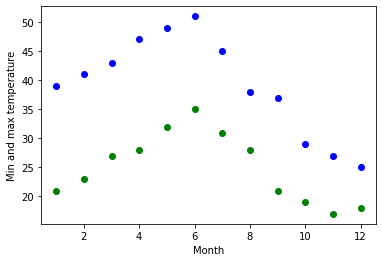

In [4]:
plt.plot(Months, Max, 'bo')
plt.plot(Months, Min, 'go')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [7]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, Months,
                                      Max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, Months,
                                      Min, [-40, 20, 0])

Text(0, 0.5, 'Temperature ($^\\circ$C)')

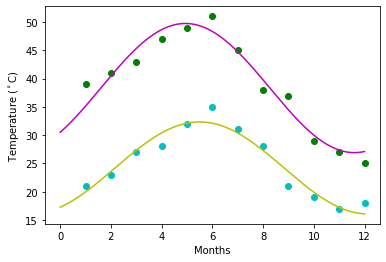

In [6]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(Months, Max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(Months, Min, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Months')
plt.ylabel('Temperature ($^\circ$C)')

# Problem 2

In [8]:
import pandas as pd

In [9]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv ')

In [10]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [11]:
Proportion = (titanic['sex'].value_counts()/len(titanic['sex']))*100

In [12]:
Proportion


male      64.351145
female    35.572519
Name: sex, dtype: float64

array([<AxesSubplot:ylabel='sex'>], dtype=object)

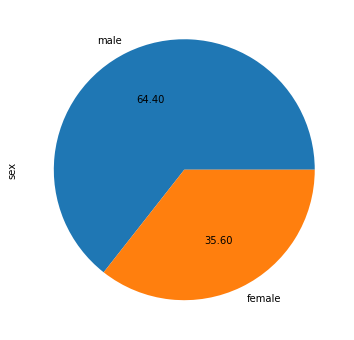

In [35]:
Proportion.plot.pie(subplots = True, figsize = (8,6),fontsize = 10,autopct = '%.2f')

<AxesSubplot:xlabel='age', ylabel='fare'>

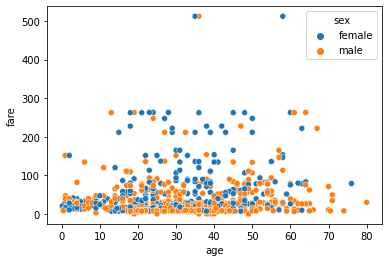

In [53]:
import seaborn as sns
sns.scatterplot(x = 'age',y = 'fare',hue ='sex',data = titanic)